<a href="https://colab.research.google.com/github/DataBaeDev/PA_Data_2024/blob/main/Advertising_5_15_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

In [ ]:
#Using logistical regression to find out "Did the user click the ad?"

#Task 2a: Install the Needed Libraries

In [ ]:
#n/a

#Task 2b: Import the Needed Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
sns.set()

#Task 3: Load the Data

In [ ]:
ad_df = pd.read_csv("https://raw.githubusercontent.com/glopez21/ML-Data/main/advertising.csv")
ad_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [ ]:
ad_df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
483,50.60,30,34191.13,129.88,Realigned reciprocal framework,New Daniellefort,1,United States of America,2016-05-03 12:57:19,1
992,69.17,40,66193.81,123.62,Extended leadingedge solution,New Patrick,0,Montenegro,2016-03-06 11:36:06,1
798,66.83,46,77871.75,196.17,Assimilated hybrid initiative,North Jeremyport,1,Cyprus,2016-02-28 23:10:32,0
949,78.96,50,69868.48,193.15,Stand-alone well-modulated product,East Jason,0,Cayman Islands,2016-02-12 01:55:38,1
391,79.97,44,70449.04,216.00,Programmable empowering middleware,Mariebury,0,China,2016-07-13 01:48:46,0


##Get Data Info

In [ ]:
print(ad_df.shape)
ad_df.info()

(1000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
print(ad_df['Country'].nunique(), " unique values in the Country column")
ad_df['Country'].value_counts()

237  unique values in the Country column


Country
France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: count, Length: 237, dtype: int64

##Find Missing Values

In [ ]:
#No missing values
ad_df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

<Axes: xlabel='Male', ylabel='Age'>

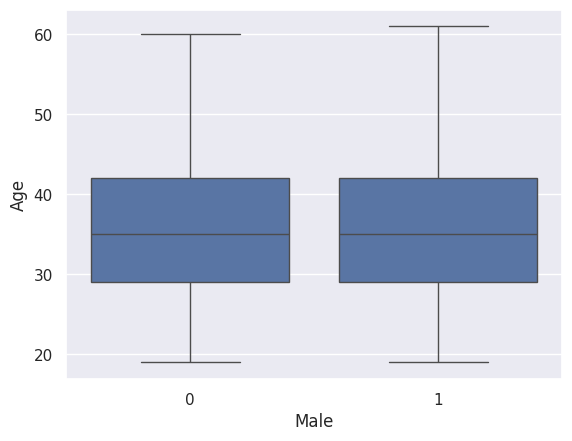

In [ ]:
#checking for outliers or values that don't make sense
sns.boxplot(x='Male', y='Age', data=ad_df)

In [ ]:
#checking for values other than 0 and 1
ad_df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

#Task 5: Perform Data Cleaning

In [ ]:
#Dropping the columns that I don't intend to use in the model
ad_df.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis="columns", inplace=True)
ad_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


#Task 6: Visualize Cleaned up Dataset

In [ ]:
#Sample values from the dataset
ad_df.sample(7)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
220,77.88,37,55353.41,254.57,0,0
933,36.73,34,46737.34,149.79,1,1
343,83.97,28,56986.73,205.50,1,0
373,41.73,47,60812.77,144.71,0,1
139,75.80,38,70575.60,146.19,1,0
199,77.05,27,66624.60,191.14,0,0
152,37.00,48,36782.38,158.22,1,1


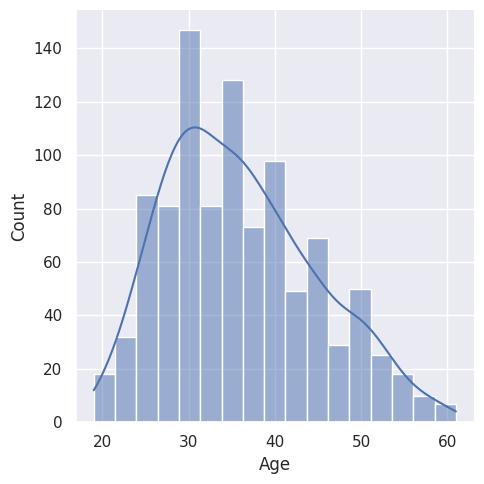

In [ ]:
#Distribution of Age
sns.displot(ad_df['Age'], kde=True);

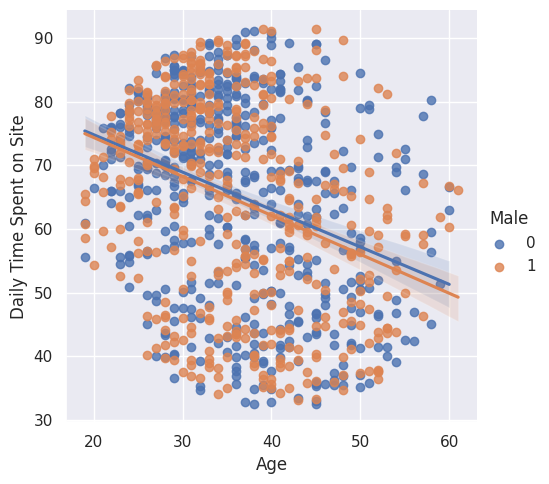

In [ ]:
#Checking for a relationship between age and daily time spent on site
#There's really no difference between males and non-males
sns.lmplot(data = ad_df, x = "Age", y = 'Daily Time Spent on Site',
            hue="Male");

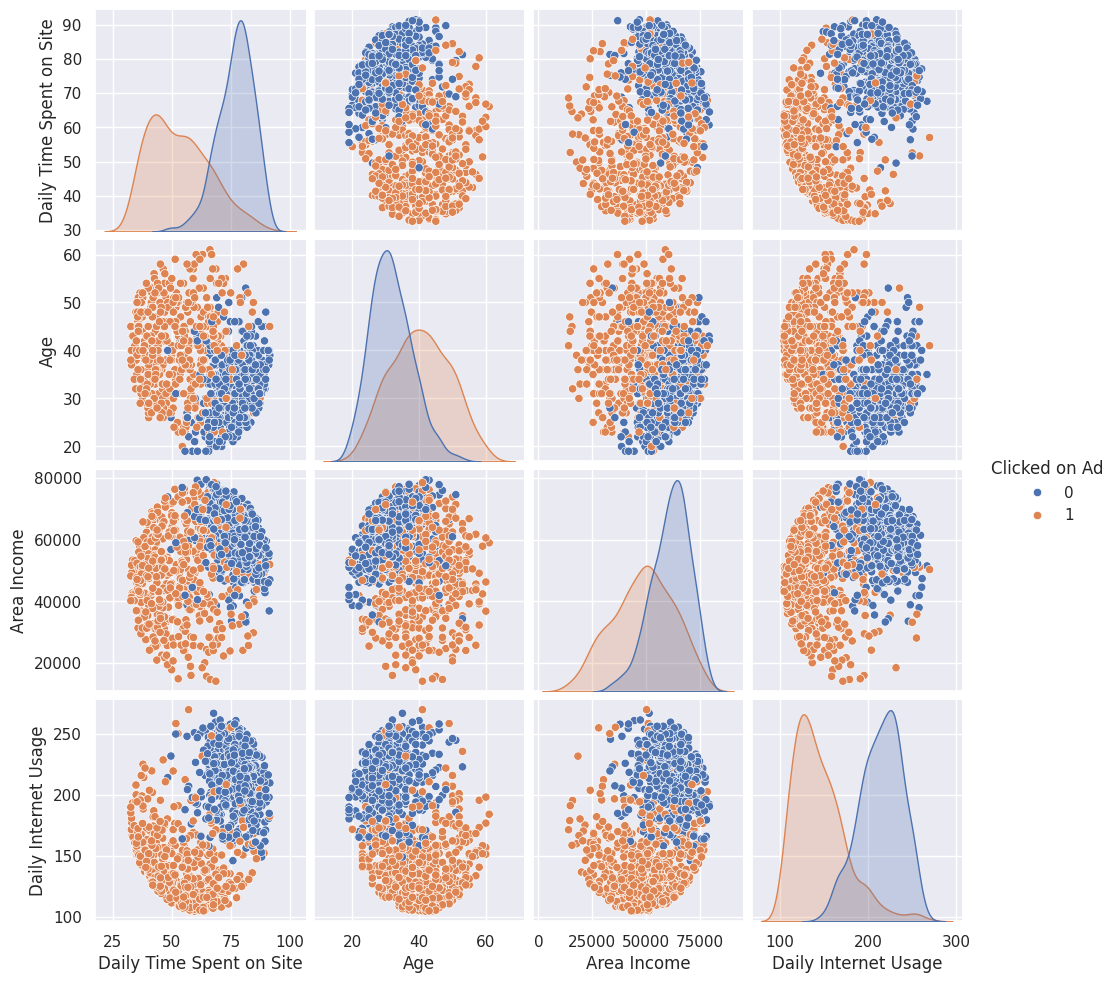

In [ ]:
#Checking relationships between pairs of variables (with exception of "Male")
sns.pairplot(data=ad_df.drop('Male',axis=1), hue="Clicked on Ad");

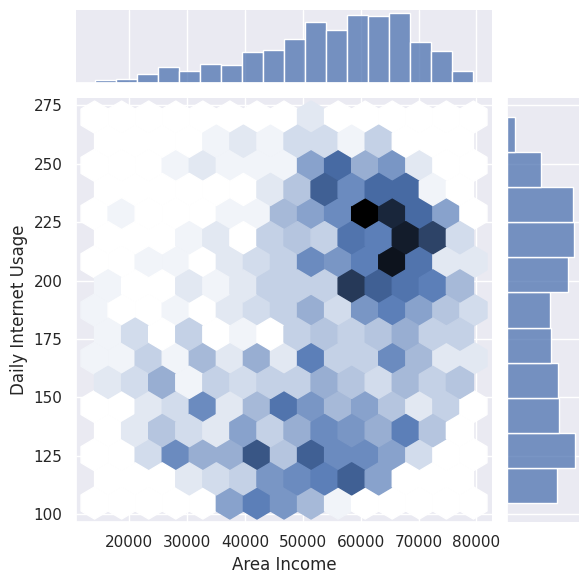

In [ ]:
#visualize the relationship between Area Income and Daily Internet Usage
sns.jointplot(data= ad_df, x="Area Income", y="Daily Internet Usage",kind="hex");

#Task 7: Conceptualize the problem

In [ ]:
#How well can the combination of the following features predict whether the user clicked on the ad
#Daily Time Spent on Site,	Age,	Area, Income,	Daily Internet Usage,	Male

#Task 8: Perform Data-Split

In [ ]:
#train on all remaining columns except "Clicked on Ad"
#Dependent variable is "Clicked on Ad"
X_train, X_test, y_train, y_test = train_test_split(ad_df.drop('Clicked on Ad',axis=1), ad_df['Clicked on Ad'], test_size=0.3, random_state=88)

#Task 9: Choose the ML Method to follow

In [ ]:
from sklearn.linear_model import LogisticRegression

#Task 10: Train the ML Model

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

#Task 11: Test the Model

In [ ]:
#LogisticRegression().predict(x)--> returns the prediction for y

predictions = logmodel.predict(X_test)
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       167
           1       0.87      0.89      0.88       133

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [ ]:
#Return the mean accuracy on the given test data and labels.
print("Model Score = ", logmodel.score(X_test,y_test))

Model Score =  0.89


In [ ]:
#Display test result details
conf_matrix = metrics.confusion_matrix(y_test, predictions)
print(
    f'''                      Confusion Matrix
              _______________________________
              |  Predicted No   | Predicted Yes
    Actual No |  Correct  {conf_matrix[0][0]}   |   Incorrect {conf_matrix[0][1]}
   Actual Yes |  Incorrect {conf_matrix[1][0]}   |   Correct {conf_matrix[1][1]}

   ''')

#sns.heatmap(pd.DataFrame(conf_matrix), annot=True ,fmt='g')


                      Confusion Matrix 
              _______________________________
              |  Predicted No   | Predicted Yes
    Actual No |  Correct  149   |   Incorrect 18
   Actual Yes |  Incorrect 15   |   Correct 118
   
   


In [ ]:
print("The model predicted that:")
print(sum(predictions==0), " Didn't Click The Ad" )
print(sum(predictions!=0), "Clicked the Ad")

print("Actually in the test group ")
print(sum(y_test==0), " Didn't Click The Ad" )
print(sum(y_test!=0), " Clicked the Ad")

The model predicted that:
164  Didn't Click The Ad
136 Clicked the Ad
Actually in the test group 
167  Didn't Click The Ad
133  Clicked the Ad
